# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a type of artificial neural network specifically designed for processing structured grid-like data, such as images, audio, and sequential data like text. They excel in tasks involving visual recognition, image classification, object detection, and more.

## Key Components of CNN

### 1. Convolutional Layers
- Apply convolution operations using filters to extract features like edges, textures, and shapes from the input data.
- Generate feature maps by sliding filters across the input.

### 2. Pooling (Subsampling) Layers
- Downsample feature maps obtained from convolutional layers using methods like max pooling or average pooling.

### 3. Activation Functions
- Introduce non-linearities (e.g., ReLU) for learning complex patterns and relationships within the data.

### 4. Fully Connected (Dense) Layers
- Perform classification or regression on learned features, combining high-level representations for predictions.

## Advantages of CNNs

- **Feature Learning:** Automatically learn relevant features from raw data.
- **Translation Invariance:** Recognize patterns regardless of their position in the input.
- **Parameter Sharing:** Efficiently share parameters across the network.
- **Hierarchical Structure:** Capture increasingly complex features hierarchically.

## Use Cases

CNNs find applications in various domains:
- Image Classification
- Object Detection
- Image Segmentation
- Facial Recognition
- Medical Image Analysis
- Natural Language Processing

CNNs revolutionize computer vision tasks by learning intricate patterns directly from raw data, making them pivotal in image-related applications within deep learning.

#### Import packages

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

from tensorflow.keras import layers, models, optimizers, utils, datasets

#### Define classes

In [4]:
NUM_CLASSES = 10

#### Prepare the data

In [6]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [7]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

#### Train the model

In [9]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [10]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10


1563/1563 [==============================] - 29s 17ms/step - loss: 1.5516 - accuracy: 0.4551 - val_loss: 1.2964 - val_accuracy: 0.5377
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1606 - accuracy: 0.5876 - val_loss: 1.0562 - val_accuracy: 0.6294
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0011 - accuracy: 0.6519 - val_loss: 1.0827 - val_accuracy: 0.6185
Epoch 4/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9140 - accuracy: 0.6808 - val_loss: 0.9450 - val_accuracy: 0.6632
Epoch 5/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8547 - accuracy: 0.7010 - val_loss: 0.8479 - val_accuracy: 0.7075
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8039 - accuracy: 0.7186 - val_loss: 0.8716 - val_accuracy: 0.6998
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7571 - accuracy: 0.7349 - val_loss: 0.9708

#### Evaluate the model

In [12]:
model.evaluate(x_test, y_test, batch_size=1000)

CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 2s 6ms/step


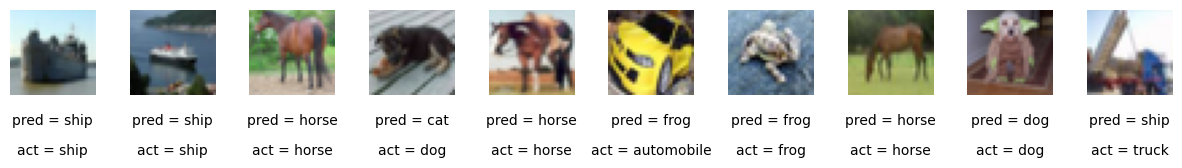

In [13]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

### That's it. 